In [1]:
import _experiments as exp
from _experiments import CV, GCD, EIS, QR
from importlib import reload
import pandas as pd
import numpy as np
import _ecplotting as ecp
import matplotlib.pyplot as plt
reload(exp)
reload(ecp)

<module '_ecplotting' from 'C:\\Users\\fes33\\Documents\\GIK - R&D\\Personal - Papers and Reports\\19 - Quadratic Model - Code with Classes\\EC\\EC3\\_ecplotting.py'>

## <font color = '#FF9933'> CV Tests </font>

In [164]:
df = pd.read_csv(r'test_data/CV.csv')
cv = CV(df, extract_sr = True)

In [167]:
cv.find_capacity(cv.currents, frac = (0,0.5))
cv.find_quad_reg_param()
cv.find_quad_cap_diff()
cv.find_lin_reg_param()
cv.find_lin_cap_diff()

In [168]:
display(cv.find_capacitiveness(frac= (0, 0.5), model = 'Quadratic'))
display(cv.find_capacitiveness(frac= (0, 0.5), model = 'Linear'))

,%Capacitive@3mV/s,%Capacitive@5mV/s,%Capacitive@10mV/s,%Capacitive@20mV/s,%Capacitive@30mV/s,%Capacitive@40mV/s,%Capacitive@50mV/s
0,0.284723,0.330883,0.389897,0.435316,0.451495,0.457255,0.458238


,%Capacitive@3mV/s,%Capacitive@5mV/s,%Capacitive@10mV/s,%Capacitive@20mV/s,%Capacitive@30mV/s,%Capacitive@40mV/s,%Capacitive@50mV/s
0,0.137927,0.171192,0.226072,0.292338,0.335966,0.368774,0.395104


<BarContainer object of 7 artists>

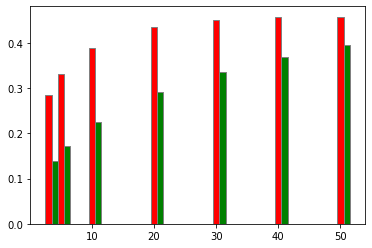

In [185]:
import seaborn as sns
c = cv.find_capacitiveness(frac= (0, 0.5), model = 'Quadratic')
c2 = cv.find_capacitiveness(frac= (0, 0.5), model = 'Linear')
c3 = pd.concat([c,c2], axis = 0)
# #sns.barplot(data = c)
barWidth = 1
br1 = cv.srates
br2 = [x + barWidth for x in br1]

plt.bar(br1, c.loc[0].tolist()
, color ='r', width = barWidth,
        edgecolor ='grey', label ='IT')
plt.bar(br2, c2.loc[0].tolist()
, color ='g', width = barWidth,
        edgecolor ='grey', label ='ECE')

In [ ]:
#cv.find_current_peaks(lookup_in = (0,350), add_offset = True,  width = 1, height = 0.01, rel_height = 1)

#dic = {'height': 2, 'aspect': 2.5, 'sharey': True, 'margin_titles':False, 'legend_out':False}
cv.find_residuals_at()
cv.residuals_at
ecp.plotcvresiduals(cv.residuals_at)
#plt.legend(bbox_to_anchor=(1.02, 3), frameon = False, ncol = 2)

In [ ]:
fig = plt.gcf()
fig.axes

In [ ]:
sns.FacetGrid??

In [ ]:
height = 4
#fig, ax = plt.subplots(figsize = (height, height))
cv.residuals_at
sr_root_lab = r"$\mathrm{\nu^{1/2} \hspace{0.5} (Vs^{-1})^{1/2}}$"
sr_root_lab = "sr"

dt = formatted_df = pd.melt(cv.residuals_at,["Voltage", "Scan"],var_name=sr_root_lab, value_name="Residual")
dt.head(3)

In [ ]:
#____See documentation for available styles____
# https://matplotlib.org/2.0.2/api/lines_api.html
col_nature_intense = ['#E64B35FF', '#4DBBD5FF', '#00A087FF', '#3C5488FF', '#F39B7FFF', '#8491B4FF', '#91D1C2FF', '#DC0000FF', '#7E6148FF', '#B09C85FF']
col_mathematica_default = ['#5E81B5', '#E19C24', '#8FB131', '#EC6235', '#8778B3']
styles = ['retro', 'seaborn-paper', 'seaborn-poster', 'grayscale', 'vibrant', 'seaborn-colorblind']


#linestyles = ['-']*len(col_nature_intense)
linestyles = ['-', '-.', ':', '--']
markerstyles = ['o', '+', 'x', '*']
colorstyles = col_nature_intense[0:4]

cycler = plt.cycler(linestyle=linestyles,
                    color = colorstyles,
                    #marker= markerstyles,
                    
                   )

#____To use styles____
styles = ['retro', 'seaborn-paper', 'seaborn-poster', 'grayscale', 'vibrant', 'seaborn-colorblind']
plt.style.use('seaborn-poster')
#print(plt.style.available)

In [ ]:
legend_style = dict(frameon = False, loc = 2, prop = {'size':10}, ncol = 1)
marker_style = dict(marker='.', 
                    linestyle='--', 
                    color = 'brown',
                    markersize=1,
                    markeredgecolor="brown", 
                    mew=1,
                    #color='brown', 
                    markerfacecolor='white', 
                    fillstyle = 'full', 
                    #markerfacecoloralt='white',
                            )

In [ ]:
#other = {'set_aspect': 4}

fig, ax0 = plt.subplots(figsize = (height, height))
#ax0.set_aspect(1)
ecp.plotcv(ax0, cv.voltages,cv.currents,  ylim = [-0.06, 0.06],
           legend = cv.cv_legend,  
           cycler=cycler, 
           legend_dic = legend_style, 
           #marker_dic = marker_style,
       #**other
          )

## <font color = '#FF9933'> GCD Tests </font>

In [ ]:
df_gcd = pd.read_csv(r'test_data/GCD.csv')
#gcd = GCD(df_gcd, extract_sp_curr = True)

### <font color = '#FF9933'> GCD Tests - Basic </font>

In [ ]:
gcd.voltages

In [ ]:
gcd.times

In [ ]:
gcd.find_discharge_voltages()
a = gcd.discharge_voltages
a
#a[~np.isnan(a).all(axis=1)]

In [ ]:
#other = {'set_aspect': 1}
height = 4
fig, ax0 = plt.subplots(figsize=(2*height, height))
#ax0.set_aspect(1)
legend_style = dict(frameon = False, loc = 1, prop = {'size':10}, ncol = 1)
marker_style = dict(marker='.', 
                    linestyle='--', 
                    color = 'brown',
                    markersize=1,
                    markeredgecolor="brown", 
                    mew=1,
                    #color='brown', 
                    markerfacecolor='white', 
                    fillstyle = 'full', 
                    #markerfacecoloralt='white',
                            )

ecp.plotgcd(ax0, gcd.times,gcd.voltages,  ylim = [0, 0.7], xlim = [0, 200],
           legend = gcd.gcd_legend,  
           cycler=cycler, 
           legend_dic = legend_style, 
           #marker_dic = marker_style,
       #**other
           )

In [ ]:
fig, ax0 = plt.subplots(figsize=(height*2, 1 *height))
ecp.plotgcd(ax0, gcd.times,gcd.voltages,  ylim = [0, 0.7], xlim = [0, 600],
           legend = gcd.gcd_legend,  
           cycler=cycler, 
           legend_dic = legend_style, 
           #marker_dic = marker_style,
       #**other
           )

### <font color = '#FF9933'> GCD Tests - Fractional Time and Logit Fitting </font>

In [5]:
file_path = r"C:\Users\fes33\Documents\GIK - R&D\Personal - Papers and Reports\19 - Quadratic Model - Code with Classes\Data - Gamry Files\MOFs\EC Porridge - HKUST.xlsb"
file_path = r"C:\Users\fes33\Documents\GIK - R&D\Personal - Papers and Reports\19 - Quadratic Model - Code with Classes\Data - Gamry Files\MOFs\EC Porridge - LiCuMOF.xlsb"
df_gcd = pd.read_excel(file_path, engine = 'pyxlsb', sheet_name = 'GCDData(Raw)', header = None)
df_gcd

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,EXPLAIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TAG,PWR800_CYCLICCHARGEDISCHARGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TITLE,LABEL,PWR Cyclic Charge Discharge,Test &Identifier,NaN,NaN,NaN,NaN,NaN,NaN,...,Test &Identifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DATE,LABEL,44643,Date,NaN,NaN,NaN,NaN,NaN,NaN,...,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TIME,LABEL,0.752674,Time,NaN,NaN,NaN,NaN,NaN,NaN,...,Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,NaN,NaN,5964,298.25,0.015418,-0.000502,0,-0.000008,-0.4984,-0.002158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14727,NaN,NaN,5965,298.3,0.013575,-0.000502,0,-0.000007,-0.4984,-0.002153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14728,NaN,NaN,5966,298.35,0.011743,-0.000502,0,-0.000006,-0.4984,-0.002151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14729,NaN,NaN,5967,298.375,0.010346,-0.000502,0,-0.000005,-0.4984,-0.002149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
gcd = GCD()

In [ ]:
gcd.from_porridge_RAW(df_gcd)
display(gcd.cycle_times)
display(gcd.currents)

[ 0.15220785 -4.46790272]


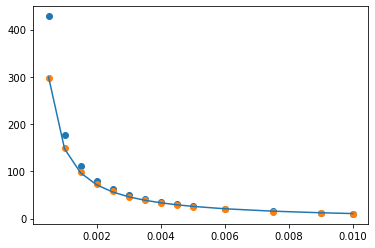

In [116]:
plt.scatter(gcd.currents, gcd.cycle_times.loc['Charging'])
plt.scatter(gcd.currents, gcd.cycle_times.loc['Discharging'])

x = gcd.currents
y =  gcd.cycle_times.loc['Discharging']

par = np.polyfit((1/x) ,y, 1)
print(par)
plt.plot(x, par[0]*1/x + par[1])



In [126]:

if not False:
    print(1)

1


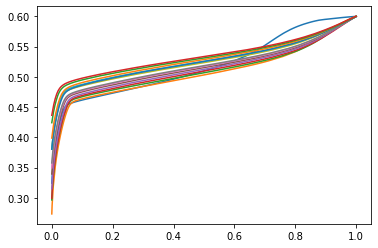

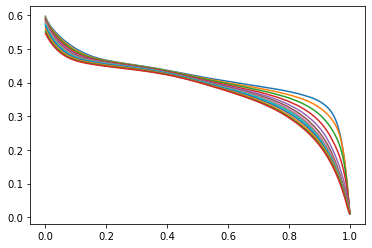

In [77]:
f_ch = np.array(gcd.charging_stretched.filter(regex = '^Vf'))
f_dis = np.array(gcd.discharging_stretched.filter(regex = '^Vf'))
t_ch = np.array(gcd.charging_stretched.iloc[:, 0])
t_dis = np.array(gcd.discharging_stretched.iloc[:, 0])
plt.plot(t_ch, f_ch)
plt.show()
plt.plot(t_dis, f_dis)
plt.show()


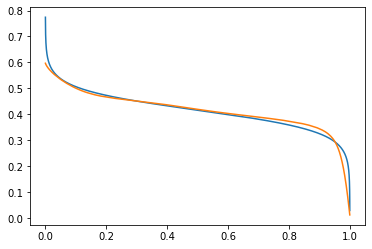

In [118]:

x = np.array(gcd.discharging_stretched.iloc[:, 0])
y = gcd.discharging_stretched.filter(regex = '^Vf').iloc[:,0]
y = np.array(y)

x = x[:-1]
y= y[:-1]
par = np.polyfit(np.log((x)/(1-x)) , y, 1)

plt.plot(x, par[0] * np.log((x)/(1-x)) + par[1])
plt.plot(x,y)

<font size = 4 color = #C39999> <i> Conclusion of the above: </i>
 For LiCuMOF the discharge times follow a $$t_{dis} = \frac{a}{i} + b$$ where as the voltages and discharge times are related by: $$V_f = ln(\frac{\frac{t}{t_{dis}}}{1-\frac{t}{t_{dis}}})$$

In [ ]:
y_str = [str(item) for item in y]
my_string = ','.join(list(y_str))

In [75]:
from pandas.io import clipboard
clipboard.copy(my_string)

In [69]:
x_str = [str(item) for item in x]
my_string = ','.join(list(x_str))
from pandas.io import clipboard
clipboard.copy(my_string)

In [76]:
gcd.discharging_stretched

,T0.0005,Vf0.0005,T0.001,Vf0.001,T0.0015,Vf0.0015,T0.002,Vf0.002,T0.0025,Vf0.0025,...,T0.005,Vf0.005,T0.006,Vf0.006,T0.0075,Vf0.0075,T0.009,Vf0.009,T0.01,Vf0.01
0,0.000168,0.596682,0.000337,0.593692,0.000504,0.591560,0.000678,0.588229,0.000864,0.585620,...,0.001987,0.572240,0.002495,0.566950,0.003359,0.558938,0.004304,0.551740,0.004998,0.545902
1,0.000335,0.596048,0.000505,0.593119,0.000672,0.591023,0.000848,0.587705,0.001037,0.585103,...,0.002153,0.571828,0.002662,0.566565,0.003527,0.558584,0.004469,0.551423,0.005164,0.545604
2,0.000503,0.595473,0.000673,0.592546,0.000840,0.590486,0.001018,0.587182,0.001210,0.584586,...,0.002319,0.571415,0.002828,0.566179,0.003695,0.558230,0.004635,0.551106,0.005331,0.545306
3,0.000670,0.594941,0.000842,0.592045,0.001007,0.589949,0.001187,0.586658,0.001382,0.584070,...,0.002484,0.571003,0.002995,0.565794,0.003863,0.557876,0.004800,0.550789,0.005497,0.545008
4,0.000838,0.594460,0.001010,0.591544,0.001175,0.589470,0.001357,0.586135,0.001555,0.583553,...,0.002650,0.570590,0.003161,0.565408,0.004031,0.557521,0.004966,0.550472,0.005664,0.544710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5963,0.999413,0.017256,0.999596,0.016460,0.999731,0.015651,0.999322,0.019102,0.999654,0.015071,...,0.999890,0.011957,0.999512,0.015399,0.999530,0.016112,0.999758,0.014113,0.999933,0.011475
5964,0.999581,0.015418,0.999764,0.014527,0.999899,0.013778,0.999491,0.017552,0.999741,0.014165,...,0.999918,0.011541,0.999634,0.014848,0.999647,0.015599,0.999818,0.013711,0.999950,0.011148
5965,0.999749,0.013575,0.999933,0.012594,0.999933,0.012641,0.999661,0.016002,0.999827,0.013258,...,0.999945,0.011125,0.999756,0.014296,0.999765,0.015086,0.999879,0.013310,0.999967,0.010820
5966,0.999916,0.011743,0.999966,0.011446,0.999966,0.011503,0.999830,0.014452,0.999914,0.012352,...,0.999973,0.010710,0.999878,0.013744,0.999882,0.014573,0.999939,0.012909,0.999983,0.010493


## <font color = '#FF9933'> EIS Tests </font>

In [ ]:
file = r'test_data/EIS.xlsx'
eis = EIS()
eis.from_excel(file)
eis.eis

In [ ]:
height = 4 
import matplotlib as mpl
fig, ax0 = plt.subplots(figsize=(height, height))
ecp.ploteis(ax0, eis.eis['Zreal'], -eis.eis['Zimag'], xlim = [0,550], ylim = [0,550])

In [ ]:
eis.eis_fitting()

In [ ]:
eis.circuit_fit

## <font color = '#FF9933'> Regression Tests </font>

In [ ]:
#fig, (ax1, ax2) = plt.subplots(2)
ax1 = plt.subplot2grid((2, 4), (0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 4), (0, 2), colspan=2) 
 
ecp.plotreg_param( (ax1, ax2), cv.voltages, cv.quad_reg_params, cycler = cycler , legend_dic = dict(loc= 3, ncol= 3, frameon=False))

## <font color = '#FF9933'> Residual Tests </font>